# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns
from itertools import chain
from collections import Counter

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [3]:
df_test = pd.read_csv('./task_1/mmlu_data/test.csv')
df_x = pd.read_csv('./task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('./task_1/lm_scores/lm_Y.csv')
df_z  =pd.read_csv('./task_1/lm_scores/lm_Z.csv')

print(f'The shape of the test data is: {df_test.shape} and the size of the test data is: {df_test.size}')
print(f'The shape of the X data is: {df_x.shape} and the size of the X data is: {df_x.size}')
print(f'The shape of the Y data is: {df_y.shape} and the size of the Y data is: {df_y.size}')
print(f'The shape of the Z data is: {df_z.shape} and the size of the Z data is: {df_z.size}')

The shape of the test data is: (14042, 8) and the size of the test data is: 112336
The shape of the X data is: (13882, 2) and the size of the X data is: 27764
The shape of the Y data is: (13978, 2) and the size of the Y data is: 27956
The shape of the Z data is: (13923, 2) and the size of the Z data is: 27846


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

#### Answer A

In [4]:
# A
print(f'The results of LM X are:\n\n {df_x.result.value_counts()}\n\n\n')
print(f'the results of LM Y are:\n\n {df_y.result.value_counts()}\n\n\n')
print(f'the results of LM Z are:\n\n {df_z.result.value_counts()}\n\n\n')

The results of LM X are:

 result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congresspers

- In the next cell, we do the same thing but using the **.to_string()** method converts the pandas Series or DataFrame into a string representation, which by default includes all rows (in their complete form), so that we can have an overall view of the data and distinguish the different types of responses. To do that, we open the output in a text editor.

####  Answer B

We observe that the LMs do not always output the answers in the correct format, they sometimes explain and clarify their reasoning which is not what we want.
Indeed, several distinct answer formats emerge (we may not cover all possibilities here) :

(let "*letter*" be either A, B, C or D)

1. The format we want : represented by a single uppercase letter among the given multiple-choice options, "*letter*";
2. A duplicate of the format we want, probably due to the improper use of spaces;
3. A prefixed format : in the form "Answer : *letter*" ;
4. Sentence-Ended, and here we could split it into two possibilities :
- with explanations,  " ...*explanatory sentence*... , so the answer is *letter*";
- combining the letter chosne with its corresponding content, " ...*listing the content of the answer letter*... ,so the answer is *letter*";
5. Standalone descriptive : independent answer that do not correspond to any of the given possibilities, for example "Not Sure" or "None of the above".

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

#### Answer A

In [5]:
df_x_filtered = df_x[df_x['result'].str.len() < 10].copy(deep=True)
df_y_filtered = df_y[df_y['result'].str.len() < 10].copy(deep=True)
df_z_filtered = df_z[df_z['result'].str.len() < 10].copy(deep=True)


#### Answer B

In [6]:
# let's see what the data looks like
print("Results of LM X before cleaning:\n", df_x_filtered['result'].value_counts())

Results of LM X before cleaning:
 result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Not Sure       73
Name: count, dtype: int64


In [7]:
# clean_answer function version based on our observations

def clean_answer(s, patterns = ['Answer:', ' ']):

    for pattern in patterns:
        s = str(s).replace(pattern, '')
        
    s = s.strip()
    
    return s


df_x_cleaned = df_x_filtered.copy()
df_y_cleaned = df_y_filtered.copy()
df_z_cleaned = df_z_filtered.copy()

# we define answers as 'A', 'B', 'C' and 'D' to get rid of "Not sure"
valid_answers = ['A', 'B', 'C', 'D']

df_x_cleaned['result'] = df_x_cleaned['result'].apply(clean_answer)
df_y_cleaned['result'] = df_y_cleaned['result'].apply(clean_answer)
df_z_cleaned['result'] = df_z_cleaned['result'].apply(clean_answer)

df_x_cleaned = df_x_cleaned[df_x_cleaned['result'].isin(valid_answers)]
df_y_cleaned = df_y_cleaned[df_y_cleaned['result'].isin(valid_answers)]
df_z_cleaned = df_z_cleaned[df_z_cleaned['result'].isin(valid_answers)]

print("Results of LM X after cleaning:\n", df_x_cleaned['result'].value_counts())
print("\nResults of LM Y after cleaning:\n", df_y_cleaned['result'].value_counts())
print("\nResults of LM Z after cleaning:\n", df_z_cleaned['result'].value_counts())

Results of LM X after cleaning:
 result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

Results of LM Y after cleaning:
 result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64

Results of LM Z after cleaning:
 result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64


#### Answer C

In [8]:
# let's see the impact of our filtering
print(f"Original df_x size: {df_x.shape}")
print(f"Cleaned df_x size: {df_x_cleaned.shape}")
print(f"Percentage of lost data: {(1 - df_x_cleaned.shape[0]/df_x.shape[0]) * 100:.2f}%\n")

print(f"Original df_y size: {df_y.shape}")
print(f"Cleaned df_y size: {df_y_cleaned.shape}")
print(f"Percentage of lost data: {(1 - df_y_cleaned.shape[0]/df_y.shape[0]) * 100:.2f}%\n")

print(f"Original df_z size: {df_z.shape}")
print(f"Cleaned df_z size: {df_z_cleaned.shape}")
print(f"Percentage of lost data: {(1 - df_z_cleaned.shape[0]/df_z.shape[0]) * 100:.2f}%\n")

Original df_x size: (13882, 2)
Cleaned df_x size: (13436, 2)
Percentage of lost data: 3.21%

Original df_y size: (13978, 2)
Cleaned df_y size: (13551, 2)
Percentage of lost data: 3.05%

Original df_z size: (13923, 2)
Cleaned df_z size: (12753, 2)
Percentage of lost data: 8.40%



We can observe that in comparison with the original dataframes, after filtering and cleaning, df_x and df_y lost about 3% of their data (which is relatively modest), and df_z lost a higher percentage of data, approximately 8.4%, indicating more entries were removed compared to the other two data frames. This might be a problem because it may reduce the statistical power of our analysis. In fact, higher data loss in df_z suggests that it produced more invalid (or non-standard) responses which could affect the assessment of its true performance relative to df_x and df_y! Suppose the true error between the models is to the nearest tenth or twentieth, our analysis will then be completely distorted as we don't consider the lost values, which are of the order of the hundredth to the nearest thousand.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

#### Answer A

In [9]:
df_x_joined = pd.merge(df_x_cleaned, df_test, on='question_id', how='inner')
df_y_joined = pd.merge(df_y_cleaned, df_test, on='question_id', how='inner')
df_z_joined = pd.merge(df_z_cleaned, df_test, on='question_id', how='inner')

df_x_joined

,question_id,result,question,A,B,C,D,answer,subject
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra
3,3,B,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra
4,4,B,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra
...,...,...,...,...,...,...,...,...,...
13431,14037,A,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions
13432,14038,A,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions
13433,14039,B,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions
13434,14040,B,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions


#### Answer B

In [10]:
# we create the column 'correct' that will contain booleans
df_x_joined['correct'] = df_x_joined['result'] == df_x_joined['answer']
df_y_joined['correct'] = df_y_joined['result'] == df_y_joined['answer']
df_z_joined['correct'] = df_z_joined['result'] == df_z_joined['answer']

# to calculate the average True=1 and False=0
average_score_x = df_x_joined['correct'].mean() * 100
average_score_y = df_y_joined['correct'].mean() * 100
average_score_z = df_z_joined['correct'].mean() * 100

print(f"LM X's Average Score: {average_score_x:.2f}%")
print(f"LM Y's Average Score: {average_score_y:.2f}%")
print(f"LM Z's Average Score: {average_score_z:.2f}%")

LM X's Average Score: 76.75%
LM Y's Average Score: 74.58%
LM Z's Average Score: 66.33%


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [11]:
def diff10(df_x, df_y):
    diff_subjects = []
    
    for subject in df_x.index:  # Iterate over subjects
        count_x = df_x.loc[subject, 'result']
        count_y = df_y.loc[subject, 'result']
        
        # Calculate the percentage difference from X's perspective
        if abs(count_y - count_x) / min(count_x,count_y)> 0.10:
            diff_subjects.append(subject)
    
    return diff_subjects

#### Answer A

In [12]:
# A
grouped_x=df_x_joined.groupby('subject').agg({'result':'count'})  #['result'].count()
grouped_y=df_y_joined.groupby('subject').agg({'result':'count'})  
grouped_z=df_z_joined.groupby('subject').agg({'result':'count'})  

list_xy=diff10(grouped_x,grouped_y)
list_xz=diff10(grouped_x,grouped_z)
list_yz=diff10(grouped_y,grouped_z)

print(f'The subjects with a difference of more than 10% between X and Y are: {list_xy}\n')
print(f'The subjects with a difference of more than 10% between X and Z are: {list_xz}\n')
print(f'The subjects with a difference of more than 10% between Y and Z are: {list_yz}\n')

The subjects with a difference of more than 10% between X and Y are: ['formal logic', 'logical fallacies', 'moral scenarios']

The subjects with a difference of more than 10% between X and Z are: ['college chemistry', 'college computer science', 'high school geography', 'moral disputes']

The subjects with a difference of more than 10% between Y and Z are: ['college chemistry', 'college computer science', 'computer security', 'medical genetics', 'moral disputes', 'moral scenarios']



These results may lead to problems, because high differences in the number of questions answered by each model can lead to biased evaluations. Indeed, models that answer more question in a given subject are more likely to have better performance in that subject due to more data points, for example for "moral disputes". This is in accurate with the data losses computed earlier for each model, we can observe just visually that count_z is often the smaller compared to count_x and count_y.

#### Answer B

A reasonable idea would be **undersampling** across subjects that are commom to two model groupings (eg. zy and xz). For the subjects that are in common to two model groupings, we take the minimum of the counts among count_x, count_y and count_z, then make all counts for that specific subject to this minimum value by randomly removing samples. For example if count_x = 15, count_y = 20, and count_z = 22, we randomly remove answers of the specific subject from df_y_joint and df_z_joint such that count_x = count_y = count_z = 15.  We could have also applied undersampling to all subject where we find more than 10% difference but we chose this model to avoid losing too much data.

Another more 'strict' idea (not treated here), which focuses on perfect equality between LMS, would have been to undersample but not randomly, and without knowing in advance the number to which the counts will be reduced : the idea is to take, for each subject, only the questions common to the three models

In [13]:
#B
common_subjects=['moral scenarios', 'college chemistry', 'college computer science', 'moral disputes']
# common_subjects= list_xy + list_xz + list_yz
# common_subjects = list(set(common_subjects))

balanced_x = df_x_joined[~df_x_joined['subject'].isin(common_subjects)]
balanced_y = df_y_joined[~df_y_joined['subject'].isin(common_subjects)]
balanced_z = df_z_joined[~df_z_joined['subject'].isin(common_subjects)]


for subject in common_subjects:
    
    min_count = min(
        df_x_joined[df_x_joined['subject'] == subject]['result'].count(),
        df_y_joined[df_y_joined['subject'] == subject]['result'].count(),
        df_z_joined[df_z_joined['subject'] == subject]['result'].count()
    )
    
    
    balanced_x = pd.concat([balanced_x, df_x_joined[df_x_joined['subject'] == subject].sample(n=min_count, random_state=13)])
    balanced_y = pd.concat([balanced_y, df_y_joined[df_y_joined['subject'] == subject].sample(n=min_count, random_state=13)])
    balanced_z = pd.concat([balanced_z, df_z_joined[df_z_joined['subject'] == subject].sample(n=min_count, random_state=13)])


In [14]:
balanced_y

,question_id,result,question,A,B,C,D,answer,subject,correct
0,0,D,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,False
1,1,D,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,False
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True
3,4,D,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,False
4,5,C,Statement 1 | If a group has an element of ord...,"True, True","False, False","True, False","False, True",A,abstract algebra,False
...,...,...,...,...,...,...,...,...,...,...
8136,8442,C,Which of the following statements would Maced...,States should give special weight to their own...,Immigration policies can have powerful economi...,Self-governance is morally irrelevant to the i...,There are reasons to think U.S. immigration po...,C,moral disputes,True
8018,8301,D,Aristotle's moral theory is a version of,virtue ethics.,consequentialism.,rights-based theory.,utilitarianism.,A,moral disputes,False
7950,8226,A,Little argues that we should accept a preroga...,we should accept a prerogative to decline radi...,abortion is absolutely morally wrong.,abortion is presumptively morally wrong but ca...,there is no clear answer about the moral statu...,A,moral disputes,True
8051,8342,C,"According to Lukianoff and Haidt, institution...",encourage students to think pathologically.,ill-prepare them for the workforce.,harm their ability to learn.,all of the above.,C,moral disputes,True


Before going through question C, it is interesting to see to what extent the data frame has been reduced :

In [15]:
print("Total number of questions taken into account: ", len(balanced_z))
print(f"Percentage of lost data: {(1 - len(balanced_z)/df_z_joined.shape[0]) * 100:.2f}%\n")

Total number of questions taken into account:  12716
Percentage of lost data: 0.29%



#### Answer C

In [16]:
# C
balanced_x['correct']=balanced_x['result']==balanced_x['answer']
balanced_y['correct']=balanced_y['result']==balanced_y['answer']
balanced_z['correct']=balanced_z['result']==balanced_z['answer']

avg_x=balanced_x['correct'].mean()
avg_y=balanced_y['correct'].mean()
avg_z=balanced_z['correct'].mean()

print(f'The average score for X is: {avg_x:.2%}')
print(f'The average score for Y is: {avg_y:.2%}')
print(f'The average score for Z is: {avg_z:.2%}')

The average score for X is: 76.76%
The average score for Y is: 74.65%
The average score for Z is: 66.32%


We can see that the average scores before and after rebalancing are almost identical, this suggests that our initial findings were robust and not heavily influenced by subject-specific imbalances, suggestign also that the capabilities of the tested models are not skewed towards or against specific areas (or even specific questions) within the MMLU dataset.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [17]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

print(f'The shape of the MMLU data is: {df_mmlu.shape} and the size of the MMLU data is: {df_mmlu.size}\n')
print(f'The shape of the other data is: {df_other.shape} and the size of the other data is: {df_other.size}\n')

The shape of the MMLU data is: (35088, 11) and the size of the MMLU data is: 385968

The shape of the other data is: (11277, 10) and the size of the other data is: 112770



In [18]:
df_mmlu

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X
...,...,...,...,...,...,...,...,...,...,...,...
35083,A,14037,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,True,Z
35084,C,14038,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions,True,Z
35085,B,14039,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,True,Z
35086,B,14040,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,True,Z


In [19]:
df_other

,result,question_id,question,A,B,C,D,answer,correct,model_name
0,B,0,Which factor will most likely cause a person t...,a leg muscle relaxing after exercise,a bacterial population in the bloodstream,several viral particles on the skin,carbohydrates being digested in the stomach,B,True,X
1,B,1,Lichens are symbiotic organisms made of green ...,carbon dioxide,food,protection,water,B,True,X
2,D,2,When a switch is used in an electrical circuit...,cause the charge to build.,increase and decrease the voltage.,cause the current to change direction.,stop and start the flow of current.,D,True,X
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X
4,C,4,"Rocks are classified as igneous, metamorphic, ...",their color,their shape,how they formed,the minerals they contain,C,True,X
...,...,...,...,...,...,...,...,...,...,...
11272,B,4479,"Iron oxides, such as rust, form when iron meta...",I and O,Ir and O,Fe and O,Pb and O,C,False,Z
11273,A,4480,When water evaporates from Earth's surface int...,The mass is reduced.,The volume is increased.,The temperature is reduced.,The pressure is increased.,C,False,Z
11274,C,4481,Which process directly adds carbon into the at...,increasing plant populations,decreasing animal populations,burning fossil fuels,forming sedimentary rock,C,True,Z
11275,D,4482,Scientists think that dolphins and whales may ...,They swim the same way.,They eat the same food.,They live in the same area of the ocean.,They have similar anatomies.,D,True,Z


### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

#### Answer A

In [20]:
# A
def model_stats(df, model_name):
    df_model = df[df['model_name'] == model_name]
    avg = df_model['correct'].mean()
    se = df_model['correct'].std() / np.sqrt(df_model['correct'].count())
    
    return avg, se


lm_mmlu_x_avg, lm_mmlu_x_se= model_stats(df_mmlu, 'X')
lm_mmlu_y_avg, lm_mmlu_y_se= model_stats(df_mmlu, 'Y')
lm_mmlu_z_avg, lm_mmlu_z_se= model_stats(df_mmlu, 'Z')

lm_other_x_avg, lm_other_x_se= model_stats(df_other, 'X')
lm_other_y_avg, lm_other_y_se= model_stats(df_other, 'Y')
lm_other_z_avg, lm_other_z_se= model_stats(df_other, 'Z')


In [21]:
models = ['X', 'Y', 'Z']
mean_accuracy_list_mmlu = [lm_mmlu_x_avg, lm_mmlu_y_avg, lm_mmlu_z_avg]
std_error_list_mmlu = [lm_mmlu_x_se, lm_mmlu_y_se, lm_mmlu_z_se]
mean_accuracy_list_other = [lm_other_x_avg, lm_other_y_avg, lm_other_z_avg]
std_error_list_other = [lm_other_x_se, lm_other_y_se, lm_other_z_se]

# Printing header
print(f"{'Model':<6} {' MMLU Mean Accuracy':<22} {'MMLU Std Error':<18} {'Other Mean Accuracy':<22} {'Other Std Error':<18}")

# Printing each model's results
for i, model in enumerate(models):
    print(f"{model:<6} {mean_accuracy_list_mmlu[i]*100:.2f}%{'':<16} {std_error_list_mmlu[i]*100:.2f}%{'':<15} {mean_accuracy_list_other[i]*100:.2f}%{'':<17} {std_error_list_other[i]*100:.2f}%")


Model   MMLU Mean Accuracy    MMLU Std Error     Other Mean Accuracy    Other Std Error   
X      74.36%                 0.40%                78.80%                  0.67%
Y      76.15%                 0.39%                72.09%                  0.73%
Z      65.60%                 0.44%                67.17%                  0.77%


#### Answer B

In [22]:
# we first create a dataframe for easy handling and add 95% CI interval

data = {
    'Model': models * 2, 
    'Dataset': ['MMLU'] * 3 + ['Other'] * 3,
    'Mean Accuracy (%)': mean_accuracy_list_mmlu + mean_accuracy_list_other,
    'Standard Error (%)': std_error_list_mmlu + std_error_list_other
}

df_stats = pd.DataFrame(data)

# we add the 95% CI interval
df_stats['CI 95%'] = df_stats['Standard Error (%)'] * 1.96
df_stats

,Model,Dataset,Mean Accuracy (%),Standard Error (%),CI 95%
0,X,MMLU,0.743588,0.004038,0.007914
1,Y,MMLU,0.761542,0.003941,0.007723
2,Z,MMLU,0.655951,0.004393,0.008610
3,X,Other,0.787976,0.006668,0.013069
4,Y,Other,0.720936,0.007317,0.014341
5,Z,Other,0.671721,0.007660,0.015014


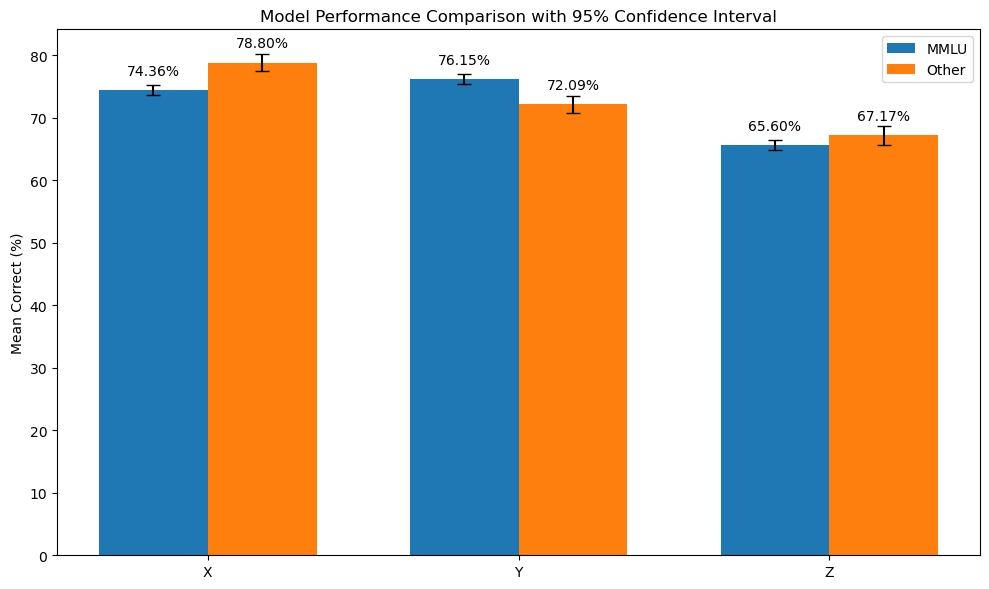

In [23]:
mmlu_means = [lm_mmlu_x_avg * 100, lm_mmlu_y_avg * 100, lm_mmlu_z_avg * 100]  
other_means = [lm_other_x_avg * 100, lm_other_y_avg * 100, lm_other_z_avg * 100]  
mmlu_se = [lm_mmlu_x_se * 100, lm_mmlu_y_se * 100, lm_mmlu_z_se * 100]  
other_se = [lm_other_x_se * 100, lm_other_y_se * 100, lm_other_z_se * 100]  


mmlu_conf_intervals = [1.96 * se for se in mmlu_se]
other_conf_intervals = [1.96 * se for se in other_se]

#plotting
bar_width = 0.35
index = np.arange(len(models))  


plt.figure(figsize=(10, 6))
plt.bar(index, mmlu_means, bar_width, yerr=mmlu_conf_intervals, label='MMLU', capsize=5)
plt.bar(index + bar_width, other_means, bar_width, yerr=other_conf_intervals, label='Other', capsize=5)
plt.ylabel('Mean Correct (%)')
plt.title('Model Performance Comparison with 95% Confidence Interval')
plt.xticks(index + bar_width / 2, models)  
plt.legend()

for i in range(3):
    plt.text(i, mmlu_means[i] + 2, f'{mmlu_means[i]:.2f}%', ha='center', va='bottom')
    plt.text(i + bar_width, other_means[i] + 2, f'{other_means[i]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Answer C

In [24]:
# let's calculate the overall mean accuracy for each LM, on both sets merged
print(f"LM X's overall mean accuracy: {np.mean(df_stats[df_stats['Model'] == 'X']['Mean Accuracy (%)'])*100:.2f}%")
print(f"LM Y's overall mean accuracy: {np.mean(df_stats[df_stats['Model'] == 'Y']['Mean Accuracy (%)'])*100:.2f}%")
print(f"LM Z's overall mean accuracy: {np.mean(df_stats[df_stats['Model'] == 'Z']['Mean Accuracy (%)'])*100:.2f}%")

LM X's overall mean accuracy: 76.58%
LM Y's overall mean accuracy: 74.12%
LM Z's overall mean accuracy: 66.38%


i. Following our findings, we could say that LM X performs better than the two others, in both datasets separately and hence generaly also.

ii. But in fact there's something odd, we can clearly see that LM Y outperforms LM X on MMLU but underperforms on Other! LM X does worse on MMLU than on Other going from 74.36% to 78.80% (a noticeable difference of 4.44%), LM Y does better on MMLU than on Other going from 76.15% to 72.09% (a noticeable difference of 4.06%), but LM Z was less likely to changes going from 65.60% in MMLU to 67.17% in Other (a difference of 1.57% only), always underperfroming LM X and LM Y. This reinforces the hypothesis that the distribution of correct answers A, B, C and D does depend on the dataset here. The standard errors are obviously larger for the Other dataset than the MMLU dataset, as the latter is much larger, we can explain that by the formula of the standard error in which we divide the standard deviation by the square-root of the datasets size.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

#### Answer A

        MMLU  Other
answer             
A       1611   1078
B       2943   1116
C       3403    924
D       3739    641


<Figure size 1000x600 with 0 Axes>

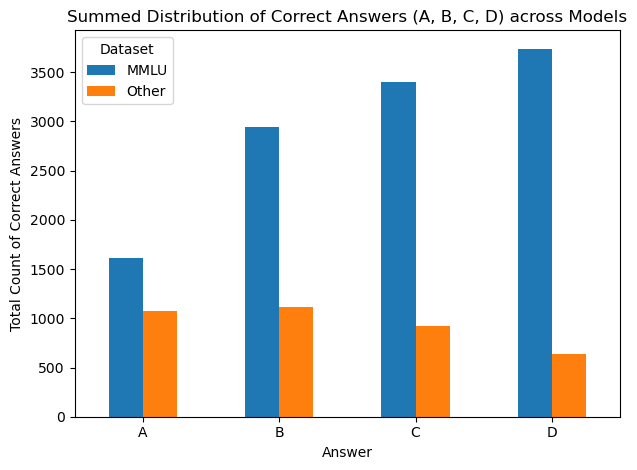

In [25]:
#A
dist_mmlu=df_mmlu.drop_duplicates('question_id').groupby('answer').agg({'answer':'count'})

dist_other=df_other.drop_duplicates('question_id').groupby('answer').agg({'answer':'count'})


df_dist = pd.concat([dist_mmlu, dist_other], axis=1)
df_dist.columns = ['MMLU', 'Other']

print(df_dist)

# Plot the sum of correct answers across models
plt.figure(figsize=(10, 6))
df_dist.plot(kind='bar')
plt.title('Summed Distribution of Correct Answers (A, B, C, D) across Models')
plt.ylabel('Total Count of Correct Answers')
plt.xlabel('Answer')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

We observe that for MMLU A < B < C < D, but for Other we have almost the opposite, with B > A > C > D. That does not seem good, the dataframes are likely to be biased.

#### Answer B

- Nul Hypothesis H0 = the distribution of correct answers (A, B, C, D) is independent of the dataset chosen (equivalent to saying that there is no significant difference between the distributions in the MMLU and Other datasets);

- Alternative Hypothesis H1 = the distribution of correct answers is dependent on the dataset (equivalent to saying that there is a significant difference between the distributions).

In [26]:
# we first build the contingency table based on our two data sets
contingency_table = df_dist

# we perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# printing the p-value for visualization purposes
print(f"P-value: {p_value}")

# we conclude things properly
alpha = 0.05
if p_value <= alpha:
    print("\nAs the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.")
else:
    print("\nAs the p_value is greater than the threshold alpha=0.05, we do NOT reject the null hypothesis.")

P-value: 4.270849602795191e-136

As the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.


The p-value of 4.27e-136 from the chi-square test indicates that this difference is statistically significant, this extreme smallness of the p-value suggests that the distributions of A, B, C and D are here clearely not independent of the dataset! We can observe from the plots that we have highly disproportionate distribution answers which could biase the models towards some specific letters.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

#### Answer A

In [27]:
df_mmlu_x=df_mmlu[df_mmlu['model_name']=='X']
df_other_x=df_other[df_other['model_name']=='X']

df_mmlu_x_mean=df_mmlu_x.groupby('answer').agg({'correct':'mean'})
df_other_x_mean=df_other_x.groupby('answer').agg({'correct':'mean'})

df_x_mean=pd.concat([df_mmlu_x_mean, df_other_x_mean], axis=1)
df_x_mean.columns=['MMLU', 'Other']

print(df_x_mean)

            MMLU     Other
answer                    
A       0.972688  0.974026
B       0.799185  0.806452
C       0.707905  0.676407
D       0.633592  0.603744


#### Answer B

- Nul Hypothesis H0 = there is no statistically significant difference in LM X's mean accuracy for answer 'A' between the MMLU and Other datasets;

- Alternative Hypothesis H1 = there is a statistically significant difference in LM X's mean accuracy for answer 'A' between the MMLU and Other datasets.

In [28]:
# we filter
df_lmX_mmlu_A = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct']
df_lmX_other_A = df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct']

# we perform the t-test
t_stat, p_value = stats.ttest_ind(df_lmX_mmlu_A, df_lmX_other_A, equal_var=False)

alpha = 0.05

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= alpha:
    print("\nAs the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.")
else:
    print("\nAs the p_value is greater than the threshold alpha=0.05, we do NOT reject the null hypothesis.")

T-statistic: -0.2116
P-value: 0.8324

As the p_value is greater than the threshold alpha=0.05, we do NOT reject the null hypothesis.


Very high p value which means that any observed difference in performance between LM X on the MMLU and Other datasets (for answer "A") is likely due to random variation, and there is no meaningful difference in performance between the two datasets.

We can conclude that LM X's performance for answer "A" is consistent across both datasets.


#### Answer C

- Nul Hypothesis H0 : There is no difference in LM's X mean accuracy when the correct answer is "A" compared to when the correct answer is "C or D."  
- Alternative Hypothesis H1 : There is a difference in LM's X mean accuracy when the correct answer is "A" compared to when the correct answer is "C or D."

In [29]:
df_lmX_mmlu_CD = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'].isin(['C', 'D']))]['correct']
t_stat_mmlu, p_value_mmlu = stats.ttest_ind(df_lmX_mmlu_A, df_lmX_mmlu_CD, equal_var=False)

print("MMLU Dataset:\n")
print(f"T-statistic: {t_stat_mmlu:.4f}")
print(f"P-value: {p_value_mmlu:.4f}")

if p_value_mmlu <= alpha:
    print("As the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.")
else:
    print("As the p_value is greater than the threshold alpha=0.05, we do NOT reject the null hypothesis.")

 
df_lmX_other_CD = df_other[(df_other['model_name'] == 'X') & (df_other['answer'].isin(['C', 'D']))]['correct']
t_stat_other, p_value_other = stats.ttest_ind(df_lmX_other_A, df_lmX_other_CD, equal_var=False)

print("\nOther Dataset:\n")
print(f"T-statistic: {t_stat_other:.4f}")
print(f"P-value: {p_value_other:.4f}")

if p_value_other <= alpha:
    print("As the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.")
else:
    print("As the p_value is greater than the threshold alpha=0.05, we do NOT reject the null hypothesis.")

MMLU Dataset:

T-statistic: 44.0588
P-value: 0.0000
As the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.

Other Dataset:

T-statistic: 25.1395
P-value: 0.0000
As the p_value is smaller than the threshold alpha=0.05, we reject the null hypothesis.


Conclusion : The difference in LM X's performance between correct answers 'A' and 'C or D' in both the MMLU and Other datasets is statistically significant, so LM X performs way better on questions where the answer is 'A' compared to those where the answer is 'C' or 'D' in both datasets.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

#### Answer A

In [30]:
# A
df_mmlu_avg=df_mmlu.groupby('answer').agg({'correct':'mean'})
df_other_avg=df_other.groupby('answer').agg({'correct':'mean'})

df_avg=pd.concat([df_mmlu_avg, df_other_avg], axis=1)
df_avg.columns=['MMLU', 'Other']

df_avg

,MMLU,Other
answer,,
A,0.746534,0.760049
B,0.709480,0.712664
C,0.703497,0.700577
D,0.732995,0.733749


#### Answer B

When we aggregate results from all language models at once, we can observe that the overall accuracies are relatively uniform across different correct answers. We can observe that the models perform in the same way accross different datasets.

## Midpoint clarification

Previously we conducted tests for 2 different analysis : 
1) **Distribution of correct answers to assess the dataset structure**  
We observed that the 2 datasets had differing distributions. This difference in answer distributions suggests that the two datasets could influence models in different ways, potentially favoring certain models if they have learned patterns associated with certain answer distributions.
2) **Consistency of models' accuracy in the answers**  
This consistency across datasets suggests that the models are inherently biased toward certain answer options, independently of the dataset.

These insights show that the models are influenced both by dataset structure via the distribution of answers and inherent biases toward certain answers, regardless of the dataset. 

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

#### Answer

By randomly permutting the position of the correct answer, any potential biases associated with a specific answer position in the dataset are disrupted, it forces the models to rely on semantic understanding rather than on learned positional biases. If we encounter again the same problems as before, our previous assumptions (that LM X is biased towards specific answer options) will be strengthened.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

#### Answer

In [32]:
df_mmlu

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X
...,...,...,...,...,...,...,...,...,...,...,...
35083,A,14037,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,True,Z
35084,C,14038,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions,True,Z
35085,B,14039,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,True,Z
35086,B,14040,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,True,Z


In [33]:
df_mmlu_shuffled=pd.read_csv('./task_2_5/lm_scores_mmlu_shuffle.csv')
df_mmlu_shuffled

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,A,0,Find the degree for the given field extension ...,4,0,2,6,A,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,C,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","True, False","False, False","False, True",C,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X
...,...,...,...,...,...,...,...,...,...,...,...
35083,A,14037,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,True,Z
35084,B,14038,To whom did ordinary folk appeal during a dro...,The Buddha,The Queen Mother of the West,Laozi,Confucius,B,world religions,True,Z
35085,B,14039,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,True,Z
35086,B,14040,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,True,Z


In [34]:
df_mmlu_x=df_mmlu[df_mmlu['model_name']=='X']
df_mmlu_y=df_mmlu[df_mmlu['model_name']=='Y']
df_mmlu_z=df_mmlu[df_mmlu['model_name']=='Z']

df_mmlu_shuffled_x=df_mmlu_shuffled[df_mmlu_shuffled['model_name']=='X']
df_mmlu_shuffled_y=df_mmlu_shuffled[df_mmlu_shuffled['model_name']=='Y']
df_mmlu_shuffled_z=df_mmlu_shuffled[df_mmlu_shuffled['model_name']=='Z']

In [35]:
def test_retest_metric(df1, df2):
    
    df1_ttm = df1[['question_id', 'correct']].set_index('question_id')
    df2_ttm = df2[['question_id', 'correct']].set_index('question_id')
    
    df_ttm_merged = pd.merge(df1_ttm, df2_ttm, on='question_id', suffixes=('_og', '_shuffled'))
    
    df_ttm_merged['ttm']=(df_ttm_merged['correct_og']*df_ttm_merged['correct_shuffled'])/len(df_ttm_merged['correct_og'])
    
    ttm=df_ttm_merged['ttm'].sum()
    
    return ttm

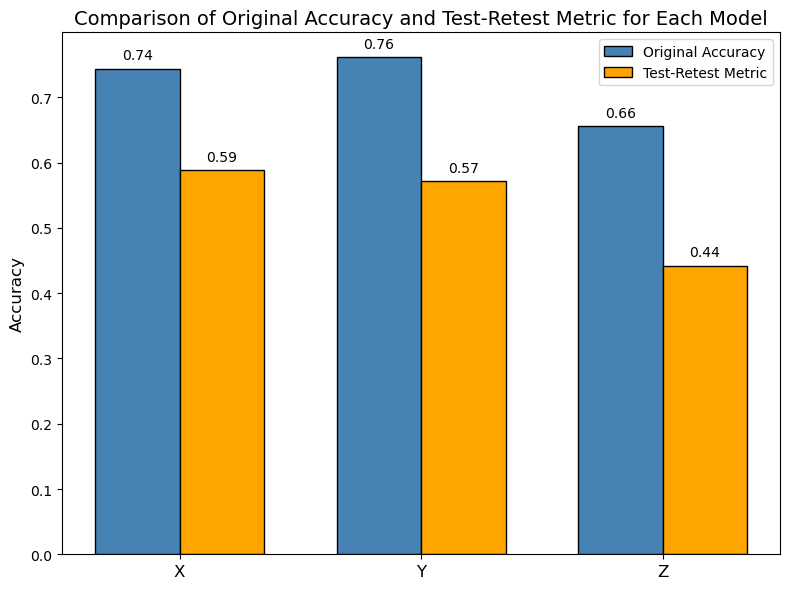

In [36]:
ttm_x=test_retest_metric(df_mmlu_x, df_mmlu_shuffled_x)
ttm_y=test_retest_metric(df_mmlu_y, df_mmlu_shuffled_y)
ttm_z=test_retest_metric(df_mmlu_z, df_mmlu_shuffled_z)

acc_x = df_mmlu_x['correct'].mean()
acc_y = df_mmlu_y['correct'].mean()
acc_z = df_mmlu_z['correct'].mean()

#plotting
original_acc = [acc_x, acc_y, acc_z]
test_retest_acc = [ttm_x, ttm_y, ttm_z]

x = range(len(models))  
width = 0.35  

plt.figure(figsize=(8, 6))
plt.bar([i - width/2 for i in x], original_acc, width=width, 
        label='Original Accuracy', color='steelblue', edgecolor='black')

plt.bar([i + width/2 for i in x], test_retest_acc, width=width,
        label='Test-Retest Metric', color='orange', edgecolor='black')

for i, (orig_acc, ttm_acc) in enumerate(zip(original_acc, test_retest_acc)):
    plt.text(i - width/2, orig_acc + 0.01, f'{orig_acc:.2f}', ha='center', va='bottom')
    plt.text(i + width/2, ttm_acc + 0.01, f'{ttm_acc:.2f}', ha='center', va='bottom')

plt.xticks(x, models, fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Original Accuracy and Test-Retest Metric for Each Model', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

We observe a significant drop in test-retest metrics, concerning all three LMs. LM X dropped from 74.36% to 58.84%, LM Y, dropped from 76.15% to 57.16%, and LM Z dropped from 65.60% to 44.16%. It seems that all models rely partially on the position of the correct answer. The models may be using heuristics based on answer positions instead of fully understanding the content!

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

#### Answer A

In [37]:
# A
df_dist_mmlu_x = df_mmlu_x.groupby('result').agg(answer_count_x=('result', 'count'),
                                                 correct_mean_x=('correct', 'mean')
                                                )

df_dist_mmlu_y = df_mmlu_y.groupby('result').agg(answer_count_y=('result', 'count'),   
                                                correct_mean_y=('correct', 'mean')
                                                )

df_dist_mmlu_z = df_mmlu_z.groupby('result').agg(answer_count_z=('result', 'count'),
                                                 correct_mean_z=('correct', 'mean')
                                                )

tmp = pd.concat([df_dist_mmlu_x, df_dist_mmlu_y, df_dist_mmlu_z], axis=1)

tmp

,answer_count_x,correct_mean_x,answer_count_y,correct_mean_y,answer_count_z,correct_mean_z
result,,,,,,
A,4259,0.367927,1072,0.937500,2176,0.476103
B,2659,0.884543,2256,0.897606,2885,0.654073
C,2409,1.000000,3015,0.827861,3237,0.703429
D,2369,1.000000,5353,0.631608,3398,0.727487


#### Answer B

LM X predicts "A" 36.41% of the time and "B", "C", and "D" roughly 20% of the time each, but when predicting "A" the accuracy is 36.79%, when predicting "B" it is 88.45% and for "C" or "D" it is 100%! So we can see that LM X frequently predicts "A" but has low accuracy when doing so it may have a bias towards "A", leading to over-prediction without corresponding accuracy. We see the same pattern for LM Y towards predicting "D", LM Y seems biased towards "D", sacrificing accuracy for frequency. Finaly, for LM Z, the distribution of answers is relatively balanced but we can see that there's something special in "A", its is predicted the least likely (18.60%) and with only 47.61% accuracy (the lowest too), so the model is eventually finding difficulty in correctly identifying when option A is the correct answer. In fact, for the answers distribution we have that D > C > B > A and for the accuracy conditonned on the given answer we have also that D > C > B > A, so the model seems in general to perform less better going from "D" to "A". In general, for all models, more the result letter predicted is frequent the less accurate it is.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [38]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


In [39]:
def decode_tokens(token):
    enc = tiktoken.encoding_for_model('gpt-4o')  # Same encoding used for tokenization
    decoded_text = enc.decode([token])
    return decoded_text

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

#### Answer A

In [40]:
#A
df_test['tokenized_questions'] = df_test['question'].apply(tokenize_text)

#Flatten the token lists
questions_tokens = [token for sublist in df_test['tokenized_questions'] for token in sublist]

#Count the frequency of each token
questions_token_counts = Counter(questions_tokens)

df_questions_token_counts = pd.DataFrame(questions_token_counts.items(), columns=['token', 'frequency'])

In [41]:
print(len(questions_tokens))
print(len(questions_token_counts))

df_questions_token_counts

802276
27986


,token,frequency
0,11437,73
1,290,51757
2,9882,56
3,395,5902
4,4335,250
...,...,...
27981,110399,1
27982,77117,1
27983,119340,1
27984,32233,1


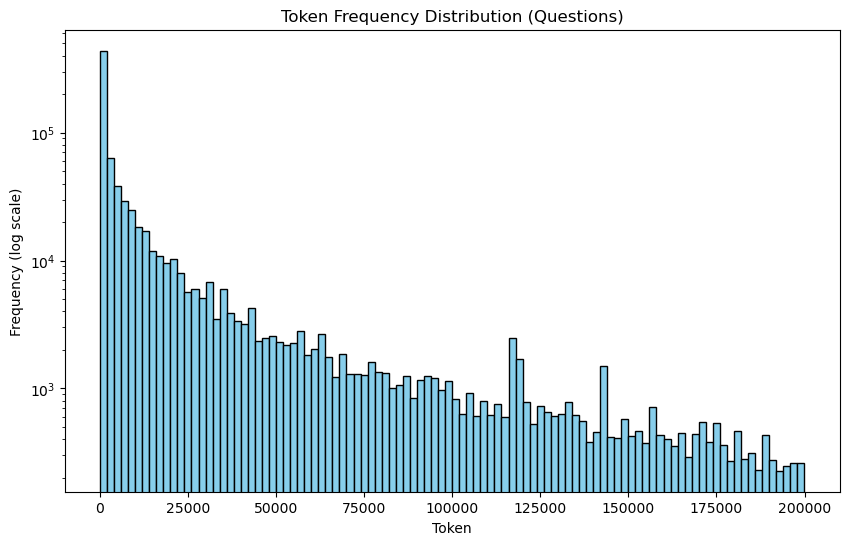

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(questions_tokens, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')  
plt.xlabel('Token')
plt.ylabel('Frequency (log scale)')
plt.title('Token Frequency Distribution (Questions)')
plt.show()

In [43]:
df_questions_token_counts['token_text'] = df_questions_token_counts['token'].apply(decode_tokens)
df_questions_token_counts = df_questions_token_counts.sort_values(by='frequency', ascending=False)
df_questions_token_counts.head(20)

,token,frequency,token_text
1,290,51757,the
36,328,28016,of
24,11,27560,","
18,13,22735,.
101,316,18561,to
58,261,15799,a
69,326,13632,and
25,220,11891,
30,306,10897,in
62,382,10561,is


We can observe that the distribution of token frequencies in questons is long tailed and right-skewed with a few tokens appearing very frequently and many appearing less frequently. The most apparent tokens can be seen the table above

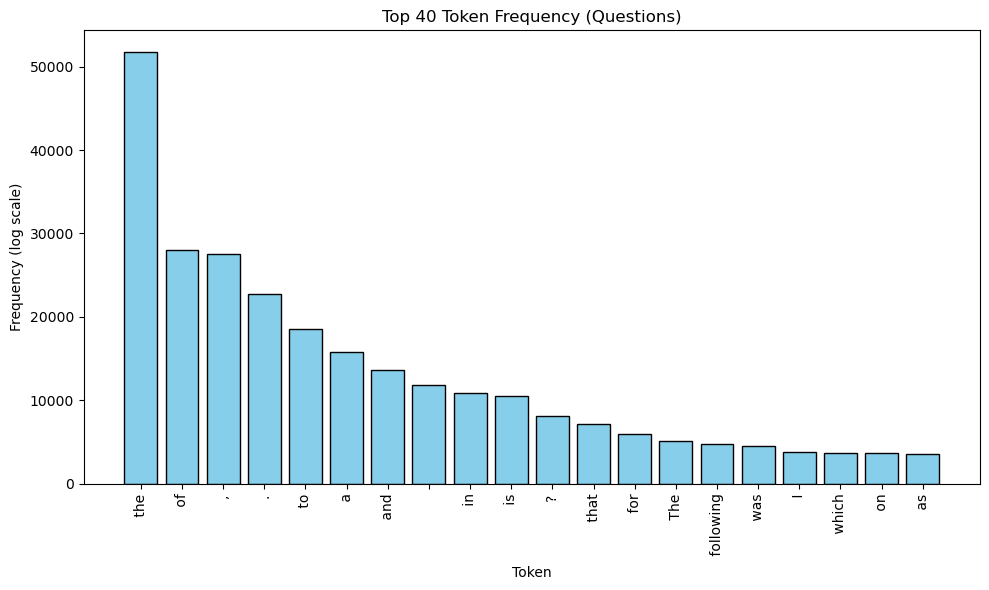

In [44]:
top_20q = df_questions_token_counts.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20q['token_text'], top_20q['frequency'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45)  
plt.xlabel('Token')
plt.xticks(rotation=90)
plt.ylabel('Frequency (log scale)')
plt.title('Top 40 Token Frequency (Questions)')
plt.tight_layout()
plt.show()


#### Answer B

In [45]:
# B
df_test['tokenized_A'] = df_test['A'].apply(tokenize_text)
df_test['tokenized_B'] = df_test['B'].apply(tokenize_text)
df_test['tokenized_C'] = df_test['C'].apply(tokenize_text)
df_test['tokenized_D'] = df_test['D'].apply(tokenize_text)

df_test['tokenized_answers'] = df_test['tokenized_A'] + df_test['tokenized_B'] + df_test['tokenized_C'] + df_test['tokenized_D']

answers_tokens=list(chain.from_iterable(df_test['tokenized_answers']))
answers_tokens_counts=Counter(answers_tokens)

df_answers_tokens_counts=pd.DataFrame(answers_tokens_counts.items(), columns=['token', 'frequency'])

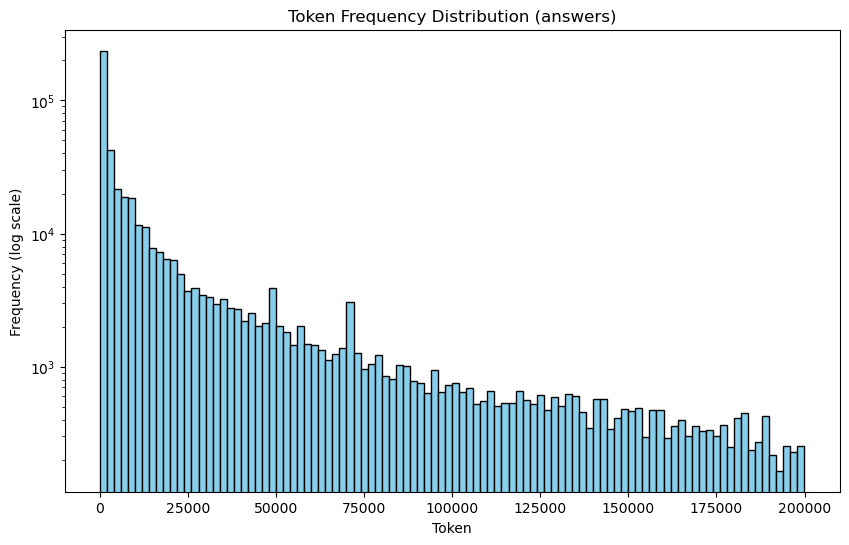

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(answers_tokens, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log') 
plt.xlabel('Token')
plt.ylabel('Frequency (log scale)')
plt.title('Token Frequency Distribution (answers)')
plt.show()

In [47]:
df_answers_tokens_counts['token_text'] = df_answers_tokens_counts['token'].apply(decode_tokens)
df_answers_tokens_counts=df_answers_tokens_counts.sort_values(by='frequency', ascending=False)
df_answers_tokens_counts.head(20)

,token,frequency,token_text
128,290,23080,the
85,13,22730,.
8,11,15206,","
90,328,13960,of
147,316,8848,to
26,326,7757,and
49,261,6541,a
98,306,5463,in
47,382,4991,is
372,976,3878,The


We find again a very similar distribution for the answers with most frequent tokens showed in the table above

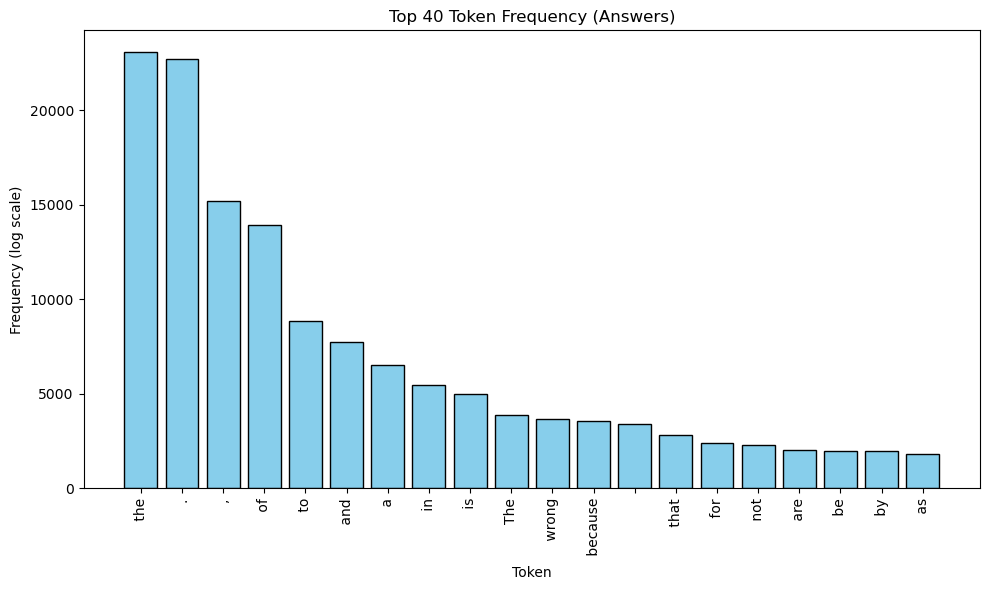

In [48]:
top_20a = df_answers_tokens_counts.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20a['token_text'], top_20a['frequency'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45)  
plt.xlabel('Token')
plt.xticks(rotation=90)
plt.ylabel('Frequency (log scale)')
plt.title('Top 40 Token Frequency (Answers)')
plt.tight_layout()
plt.show()

#### Answer C

In [49]:
#C
token_A=tokenize_text('A')[0]
token_B=tokenize_text('B')[0]
token_C=tokenize_text('C')[0]
token_D=tokenize_text('D')[0]

token_abcd_counts = {
    'A': questions_tokens.count(token_A) + answers_tokens.count(token_A),
    'B': questions_tokens.count(token_B) + answers_tokens.count(token_B),
    'C': questions_tokens.count(token_C) + answers_tokens.count(token_C),
    'D': questions_tokens.count(token_D) + answers_tokens.count(token_D),
}

total_abcd = sum(token_abcd_counts.values())

relative_distribution = {key: count / total_abcd for key, count in token_abcd_counts.items()}

print("Relative Distribution of 'A', 'B', 'C', 'D' tokens:")
for token, relative_freq in relative_distribution.items():
    print(f"{token}: {relative_freq:.4f}")
    
print(f'\nsum of frequencies: {sum(relative_distribution.values())}')

Relative Distribution of 'A', 'B', 'C', 'D' tokens:
A: 0.7917
B: 0.0602
C: 0.1015
D: 0.0466

sum of frequencies: 0.9999999999999999


We can see a very clear dominance of the token for "A", which appears in 79.17% of the total occurrences across both questions and answers! This imbalance could potentially bias the language model towards favoring options labeled as "A" and explain some of the results found in the previous task.

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


#### Answer a

In [50]:
#A
#1
df_test['A_count'] = df_test['tokenized_questions'].apply(lambda x: x.count(token_A)) + df_test['tokenized_answers'].apply(lambda x: x.count(token_A))
df_test['B_count'] = df_test['tokenized_questions'].apply(lambda x: x.count(token_B)) + df_test['tokenized_answers'].apply(lambda x: x.count(token_B))
df_test['C_count'] = df_test['tokenized_questions'].apply(lambda x: x.count(token_C)) + df_test['tokenized_answers'].apply(lambda x: x.count(token_C))
df_test['D_count'] = df_test['tokenized_questions'].apply(lambda x: x.count(token_D)) + df_test['tokenized_answers'].apply(lambda x: x.count(token_D))

#2
df_test['tokens_number'] = df_test['tokenized_questions'].apply(len) + df_test['tokenized_answers'].apply(len)

#3
df_test['A_freq'] = df_test['A_count'] / df_test['tokens_number']
df_test['B_freq'] = df_test['B_count'] / df_test['tokens_number']
df_test['C_freq'] = df_test['C_count'] / df_test['tokens_number']
df_test['D_freq'] = df_test['D_count'] / df_test['tokens_number']

df_test_grouped = df_test.groupby('answer').agg({'A_freq': 'mean', 
                                                 'B_freq': 'mean', 
                                                 'C_freq': 'mean', 
                                                 'D_freq': 'mean', 
                                                 'tokens_number': 'sum'  
                                                })

#4
df_test_grouped

,A_freq,B_freq,C_freq,D_freq,tokens_number
answer,,,,,
A,0.003267,0.000414,0.000451,0.000294,300318
B,0.002916,0.000400,0.000556,0.000299,307647
C,0.002794,0.000341,0.000677,0.000318,331965
D,0.003093,0.000291,0.000572,0.000267,347892


In [51]:
print("Answer Tokens ('A', 'B', 'C', 'D'):\n", df_answers_tokens_counts[df_answers_tokens_counts['token_text'].isin(['A', 'B', 'C', 'D'])])
print("\nQuestion Tokens ('A', 'B', 'C', 'D'):\n", df_questions_token_counts[df_questions_token_counts['token_text'].isin(['A', 'B', 'C', 'D'])])


Answer Tokens ('A', 'B', 'C', 'D'):
       token  frequency token_text
230      32       1100          A
618      34        323          C
1784     33        174          B
586      35        144          D

Question Tokens ('A', 'B', 'C', 'D'):
       token  frequency token_text
389      32       2214          A
992      34        102          C
271      33         78          B
2855     35         51          D


#### Answer B

- For answers A and C, the mean frequencies of appearnce of tokens A and C is the highest respectively which could push to think that their frequency influences the answers. 
- However, for token B, its mean frequency is the second highest amongst tokens with a differnce o barely .000014 with the frequency of A. 
- Moreover, the mean frequency of D is the lowest for answer D which would push us to think the opposite way, where the frequency of token dont have any influence on model's answers  

While it’s true that 3 out of 4 answers seem to show some influence from token frequency, this alone isn't enough to definitively claim that token frequency strongly impacts the model's decisions.

In [52]:
df_test

,question,A,B,C,D,answer,subject,question_id,tokenized_questions,tokenized_A,...,tokenized_answers,A_count,B_count,C_count,D_count,tokens_number,A_freq,B_freq,C_freq,D_freq
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,"[11437, 290, 9882, 395, 290, 4335, 3259, 15369...",[15],...,"[15, 19, 17, 21]",0,0,0,0,29,0.0,0.0,0.0,0.0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,"[12845, 275, 314, 350, 16, 11, 220, 17, 11, 22...",[23],...,"[23, 17, 1494, 6106]",0,0,0,0,41,0.0,0.0,0.0,0.0
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,"[11437, 722, 42274, 306, 290, 26832, 73104, 32...",[15],...,"[15, 16, 15, 11, 16, 15, 11, 19]",0,0,0,0,47,0.0,0.0,0.0,0.0
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3,"[9900, 220, 16, 1022, 355, 12332, 3566, 328, 2...","[4710, 11, 6432]",...,"[4710, 11, 6432, 8168, 11, 7983, 4710, 11, 798...",0,0,0,0,60,0.0,0.0,0.0,0.0
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4,"[11437, 290, 1888, 328, 290, 4335, 1823, 17403...","[17, 87, 61, 17, 659, 220, 20]",...,"[17, 87, 61, 17, 659, 220, 20, 21, 87, 61, 17,...",0,0,0,0,72,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,14037,"[4827, 853, 1339, 261, 11082, 5184, 328, 20159...","[119249, 326, 39136]",...,"[119249, 326, 39136, 17027, 326, 16044, 46872,...",0,0,0,0,27,0.0,0.0,0.0,0.0
14038,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions,14038,"[2514, 15904, 2242, 30633, 30578, 21446, 3354,...","[976, 76309]",...,"[976, 76309, 43, 3458, 3121, 976, 23721, 29172...",0,0,0,0,31,0.0,0.0,0.0,0.0
14039,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,14039,"[623, 128531, 2914, 72557, 784, 2453, 4748, 11...","[1440, 261, 6771, 30837]",...,"[1440, 261, 6771, 30837, 1440, 290, 2684, 3083...",0,0,0,0,26,0.0,0.0,0.0,0.0
14040,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,14040,"[20885, 316, 290, 18938, 12839, 30022, 11, 121...",[9960],...,"[9960, 40, 33321, 13160, 40, 33321, 4938, 176586]",0,0,0,0,27,0.0,0.0,0.0,0.0


### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [53]:
# A
df_length=df_test[df_test['tokens_number']>300]

df_length=df_length.groupby('subject').agg({'question':'count'})
df_length.sort_values(by='question', ascending=False, inplace=True)
df_length

,question
subject,
professional law,315
high school world history,124
high school european history,94
high school us history,85
professional medicine,14
college medicine,5
security studies,4
high school computer science,1
high school statistics,1


#### Answer B

We observe that some particular subjects feature a significant fraction of long question-answers pairs that exceed the turbo model's 300-token context limit. For these subjects for which the problem is significant, the government could use the other models, and let the Turbo Model for subjects where the percentage of question-answers pairs over 300 tokens is less than some threshold (for example 5%).
If they can do a model selection based on questions rather than subjects that's even better, using the Turbo Model for question-answers pairs that are 300 tokens or fewer and the other models for question-answers pairs exceeding the 300-token limit.
They could also do some preprocessing techniques consisting of rewriting the problematic question-answers pairs in a more concise manner without altering their meaning.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

#### Answer


Based on the analysis from tasks 1, 2, and 3, here is my final recommendation to the government on the use of LMs in education:

1. Inconsistent answer formats: We observed that LMs do not always provide answers in the desired format. They can include explanation and clarification of their reasoning, or use different formats for the same amount of information (like "Answer: A" instead of just "A"). This inconsistency can lead to high difficulties and inaccuracies in automatic grading and may affect the reliability of assessments.

2. Address potential positional biases: The LMs could rely also on the position of the correct answer rather than only understanding the content. When we shuffled the positions of correct answers, all models showed significant drops in performance. This suggests that models may be using heuristics based on answer positions instead of fully understanding the questions, and this could lead to unfair assessments. It's important to address this bias to ensure that models make decisions based on comprehension rather than position.

3. Mitigate bias influencing answer choices: Certain LMs show biases towards specific answer options, possibly due to token imbalances in the data. For example, LM X frequently predicts "A" but has low accuracy when doing so, while achieving high accuracy when predicting "C" or "D" despite predicting them less often. Similarly, LM Y seems biased towards "D", predicting it frequently but with lower accuracy compared to other options. We also observed a clear dominance of the token for "A" across both questions and answers, which could bias models towards favoring options labeled as "A". Balancing the token distribution and addressing these biases is essential to prevent models from being unfairly influenced.

4. Manage context length limitations for cheaper LMs: We saw that some subjects have a significant number of question-answer pairs exceeding the turbo model's 300-token context limit, especially in high school history subjects. For these cases, relying solely on the turbo model could lead to incomplete processing of information. The government could consider using other models for longer inputs or apply preprocessing techniques to rewrite the problematic question-answer pairs more concisely without altering their meaning.



Other interesting point : 

0. Ensure fairness in model evaluations: Significant differences in the number of questions answered by each model across subjects can lead to biased evaluations. To address this, it is necessary to implement data balancing techniques like undersampling to equalize the number of questions per subject for each model, or (more strictly) evaluate all models on a common set of questions. This will ensure fairer performance comparisons.